In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import os

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
import sklearn.metrics as metrics

In [9]:
loan1=pd.read_csv('C:\\Users\\JENIFFER JOHN\\DSE\\SampleData\\loan_data_train.csv')

In [10]:
loan1.head(10)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
5,32737.0,5400,5375,8.90%,36 months,small_business,6.27%,OH,RENT,3000.00,785-789,2,90,2.0,NaN
6,71685.0,16000,16000,22.47%,60 months,credit_card,11.27%,CA,RENT,4791.67,665-669,5,8474,0.0,2 years
7,38028.0,6400,6400,7.51%,36 months,major_purchase,9.58%,IL,RENT,6400.00,735-739,11,12306,1.0,< 1 year
8,32119.0,24000,23772.15,12.99%,60 months,home_improvement,15.54%,NC,MORTGAGE,8333.33,740-744,24,56984,0.0,NaN
9,84563.0,8000,8000,7.62%,36 months,other,0%,NC,MORTGAGE,3500.00,765-769,7,0,1.0,NaN


In [11]:
loan1['Data']='Train'

In [12]:
loan1.shape

(2200, 16)

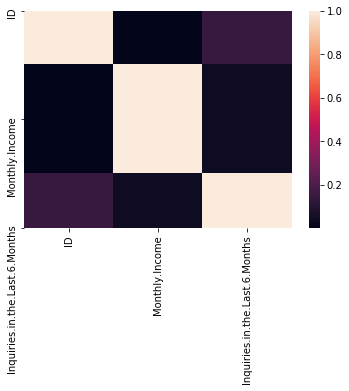

In [13]:
sns.heatmap((loan1.corr()))

In [14]:
loan1.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Data
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,Train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,Train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,Train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,Train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,Train


In [15]:
loan2= pd.read_csv('C:\\Users\\JENIFFER JOHN\\DSE\\SampleData\\loan_data_test.csv')

In [16]:
loan2.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [17]:
loan2['Data']='Test'

In [18]:
loan2.shape

(300, 15)

# Train and Test concatenation

In [19]:
loan= pd.concat([loan1,loan2],axis=0,ignore_index=True)
loan.tail(5)

,Amount.Funded.By.Investors,Amount.Requested,Data,Debt.To.Income.Ratio,Employment.Length,FICO.Range,Home.Ownership,ID,Inquiries.in.the.Last.6.Months,Interest.Rate,Loan.Length,Loan.Purpose,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,State
2495,11975,12000,Test,13.91%,7 years,705-709,MORTGAGE,24675.0,2.0,NaN,60 months,home_improvement,7083.33,7,3923,NV
2496,5000,5000,Test,17.22%,10+ years,705-709,OWN,69456.0,0.0,NaN,36 months,debt_consolidation,4000.00,10,6023,CA
2497,4375,4375,Test,9.09%,6 years,670-674,RENT,97954.0,2.0,NaN,36 months,credit_card,2916.67,9,6944,CA
2498,13600,13600,Test,12.85%,10+ years,675-679,RENT,36931.0,0.0,NaN,60 months,credit_card,5651.33,13,24383,MN
2499,6000,6000,Test,7.64%,2 years,675-679,MORTGAGE,34744.0,0.0,NaN,36 months,debt_consolidation,5184.75,8,14422,IL


In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Amount.Funded.By.Investors        2499 non-null object
Amount.Requested                  2499 non-null object
Data                              2500 non-null object
Debt.To.Income.Ratio              2499 non-null object
Employment.Length                 2422 non-null object
FICO.Range                        2500 non-null object
Home.Ownership                    2499 non-null object
ID                                2499 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Interest.Rate                     2200 non-null object
Loan.Length                       2499 non-null object
Loan.Purpose                      2499 non-null object
Monthly.Income                    2497 non-null float64
Open.CREDIT.Lines                 2496 non-null object
Revolving.CREDIT.Balance          2497 non-null object
State                             2499 non-null object
dtypes: fl

In [21]:
loan.isnull().sum()

Amount.Funded.By.Investors          1
Amount.Requested                    1
Data                                0
Debt.To.Income.Ratio                1
Employment.Length                  78
FICO.Range                          0
Home.Ownership                      1
ID                                  1
Inquiries.in.the.Last.6.Months      3
Interest.Rate                     300
Loan.Length                         1
Loan.Purpose                        1
Monthly.Income                      3
Open.CREDIT.Lines                   4
Revolving.CREDIT.Balance            3
State                               1
dtype: int64

In [22]:
loan.shape

(2500, 16)

# Data Cleaning 

In [29]:
loan=loan.replace('.',np.nan)

In [33]:
loan[loan[i]=='.']

,Amount.Funded.By.Investors,Amount.Requested,Data,Debt.To.Income.Ratio,Employment.Length,FICO.Range,Home.Ownership,ID,Inquiries.in.the.Last.6.Months,Interest.Rate,Loan.Length,Loan.Purpose,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,State


In [16]:
loan.drop(columns=['Amount.Funded.By.Investors','ID'],inplace=True)

In [17]:
loan.shape

(2500, 14)

In [18]:
loan['Debt.To.Income.Ratio']=loan['Debt.To.Income.Ratio'].apply(lambda x :str(x).strip('%'))

In [19]:
loan['Employment.Length']=list(map(lambda x:str(x).strip('years'),loan['Employment.Length']))
loan['Employment.Length']=list(map(lambda x:str(x).replace('< 1','0'),loan['Employment.Length']))
loan['Employment.Length']=list(map(lambda x:str(x).replace('10+','10'),loan['Employment.Length']))
loan['Employment.Length'].replace('nan',0,inplace=True)

In [20]:
loan['FICO']=loan['FICO.Range'].str.split('-')
loan['FICO']=loan['FICO'].apply(lambda x: (int(x[0])+ int(x[1]) )/2 )

In [21]:
loan=loan.drop(columns=['FICO.Range'],axis=1)

In [22]:
loan['Interest.Rate']=loan['Interest.Rate'].str.replace('%','')

# Data type conversion

In [23]:
for col in ['Amount.Requested','Interest.Rate','Debt.To.Income.Ratio',
             'Employment.Length','Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
    loan[col]=pd.to_numeric(loan[col],errors='coerce')

In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
Amount.Requested                  2495 non-null float64
Data                              2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
Employment.Length                 2500 non-null int64
Home.Ownership                    2499 non-null object
Inquiries.in.the.Last.6.Months    2497 non-null float64
Interest.Rate                     2200 non-null float64
Loan.Length                       2498 non-null object
Loan.Purpose                      2499 non-null object
Monthly.Income                    2497 non-null float64
Open.CREDIT.Lines                 2491 non-null float64
Revolving.CREDIT.Balance          2495 non-null float64
State                             2498 non-null object
FICO                              2500 non-null float64
dtypes: float64(8), int64(1), object(5)
memory usage: 273.6+ KB


# Null-value imputation whole concatenated dataset using train data's mean values 

In [25]:
numeric_columns=loan.select_dtypes(exclude='object').columns
for i in numeric_columns:
    if( i not in ['Interest.Rate']) & (loan[i].isnull().sum()!=0):
        meanval=loan[loan['Data']=='Train'][i].mean()
        loan[i] = loan[i].replace(np.nan,meanval)  

In [26]:
categ_columns=loan.select_dtypes(include='object').columns
for i in categ_columns:
    if (i not in ['Data']) & (loan[i].isnull().sum()!=0):
        modeval=loan[loan['Data']=='Train'][i].mode()
        loan[i] = loan[i].astype(str).replace(np.nan,modeval)  
categ_columns

Index(['Data', 'Home.Ownership', 'Loan.Length', 'Loan.Purpose', 'State'], dtype='object')

In [27]:
loan.isnull().sum()

Amount.Requested                    0
Data                                0
Debt.To.Income.Ratio                0
Employment.Length                   0
Home.Ownership                      0
Inquiries.in.the.Last.6.Months      0
Interest.Rate                     300
Loan.Length                         0
Loan.Purpose                        0
Monthly.Income                      0
Open.CREDIT.Lines                   0
Revolving.CREDIT.Balance            0
State                               0
FICO                                0
dtype: int64

In [28]:
loan.to_excel('output5.xlsx',sheet_name='Sheet_name_1')

# Creating dummies for catergorical variables

In [29]:
cat_cols=loan.select_dtypes('object').columns
cat_cols=cat_cols.drop(['Data'])
cat_cols

Index(['Home.Ownership', 'Loan.Length', 'Loan.Purpose', 'State'], dtype='object')

In [30]:
loan['Loan.Length'].value_counts()

36 months    1950
60 months     548
nan             2
Name: Loan.Length, dtype: int64

In [31]:
for col in cat_cols:
    freqs=loan[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        loan[name]=(loan[col]==cat).astype(int)
    del loan[col]
    print(col)

Home.Ownership
Loan.Length
Loan.Purpose
State


In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 51 columns):
Amount.Requested                   2500 non-null float64
Data                               2500 non-null object
Debt.To.Income.Ratio               2500 non-null float64
Employment.Length                  2500 non-null int64
Inquiries.in.the.Last.6.Months     2500 non-null float64
Interest.Rate                      2200 non-null float64
Monthly.Income                     2500 non-null float64
Open.CREDIT.Lines                  2500 non-null float64
Revolving.CREDIT.Balance           2500 non-null float64
FICO                               2500 non-null float64
Home.Ownership_MORTGAGE            2500 non-null int32
Home.Ownership_RENT                2500 non-null int32
Loan.Length_36 months              2500 non-null int32
Loan.Purpose_debt_consolidation    2500 non-null int32
Loan.Purpose_credit_card           2500 non-null int32
Loan.Purpose_other                 2500 non-null in

In [33]:
loan.shape

(2500, 51)

# Splitting Test and Train 

In [34]:
traindf = loan[loan['Data']=='Train']
traindf.shape

(2200, 51)

In [35]:
testdf =loan[loan['Data']=='Test']
testdf.shape

(300, 51)

In [45]:
X=traindf.drop(['Interest.Rate','Data'],axis=1)
y=traindf['Interest.Rate']
X.shape, y.shape

((2200, 49), (2200,))

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_tr_train,y_train,y_tr_train=train_test_split(X,y,test_size=0.2,random_state=2)

# Building base model

In [51]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('Intercept:',lin_reg.intercept_)

Intercept: 76.06657958541928


In [53]:
list(zip(X_train.columns,lin_reg.coef_))

[('Amount.Requested', 0.0001563895947713165),
 ('Debt.To.Income.Ratio', -0.0038000805994207717),
 ('Employment.Length', 0.027121105715826155),
 ('Inquiries.in.the.Last.6.Months', 0.3365251665045092),
 ('Monthly.Income', -2.664553953218851e-05),
 ('Open.CREDIT.Lines', -0.04048263117051154),
 ('Revolving.CREDIT.Balance', -3.9668399711700886e-06),
 ('FICO', -0.08669575302869309),
 ('Home.Ownership_MORTGAGE', -0.48296527234741404),
 ('Home.Ownership_RENT', -0.23868445539165928),
 ('Loan.Length_36 months', -3.1428776050032003),
 ('Loan.Purpose_debt_consolidation', -0.4712648677433424),
 ('Loan.Purpose_credit_card', -0.61239673101994),
 ('Loan.Purpose_other', 0.4447508174274506),
 ('Loan.Purpose_home_improvement', -0.3728310363973284),
 ('Loan.Purpose_major_purchase', -0.10567730482750379),
 ('Loan.Purpose_small_business', 0.060126539282745306),
 ('Loan.Purpose_car', 0.006374218187683078),
 ('Loan.Purpose_wedding', -0.7921428316396416),
 ('Loan.Purpose_medical', -0.41514519640478853),
 ('Loa

In [54]:
print('R2:',lin_reg.score(X_train,y_train))

R2: 0.7634242870607358


In [61]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest.Rate   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:24:12   Log-Likelihood:                -4675.7
No. Observations:                2200   AIC:                             9451.
Df Residuals:                    2150   BIC:                             9736.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              76.0094      1.056     71.993      0.000      73.939      78.080
Amount.Requested                    0.0002   7.19e-06     22.326      0.000       0.000       0.000
Debt.To.Income.Ratio               -0.0011      0.007     -0.154      0.878      -0.014       0.012
Employment.Length                   0.0164      0.013      1.307      0.191      -0.008       0.041
Inquiries.in.the.Last.6.Months      0.3377      0.037      9.119      0.000       0.265       0.410
Monthly.Income                  -2.605e-05   1.31e-05     -1.991      0.047   -5.17e-05   -3.87e-07
Open.CREDIT.Lines                  -0.0354      0.011     -3.150      0.002      -0.057      -0.013
Revolving.CREDIT.Balance        -2.854e-06   2.71e-06     -1.052      0.293   -8.17e-06    2.46e-06
FICO                               -0.0865      0.001    -64.342      0.000      -0.089      -0.084
Home.Ownership_MORTGAGE            -0.3884      0.170     -2.279      0.023      -0.723      -0.054
Home.Ownership_RENT                -0.1919      0.169     -1.137      0.255      -0.523       0.139
Loan.Length_36 months              -3.1504      0.120    -26.357      0.000      -3.385      -2.916
Loan.Purpose_debt_consolidation    -0.7638      0.290     -2.637      0.008      -1.332      -0.196
Loan.Purpose_credit_card           -0.8644      0.302     -2.860      0.004      -1.457      -0.272
Loan.Purpose_other                  0.0679      0.321      0.212      0.832      -0.561       0.696
Loan.Purpose_home_improvement      -0.6894      0.334     -2.064      0.039      -1.344      -0.034
Loan.Purpose_major_purchase        -0.4149      0.358     -1.158      0.247      -1.118       0.288
Loan.Purpose_small_business        -0.2692      0.363     -0.742      0.458      -0.981       0.443
Loan.Purpose_car                   -0.5116      0.416     -1.230      0.219      -1.327       0.304
Loan.Purpose_wedding               -0.9937      0.448     -2.219      0.027      -1.872      -0.115
Loan.Purpose_medical               -0.5747      0.492     -1.167      0.243      -1.540       0.391
Loan.Purpose_moving                 0.7232      0.498      1.453      0.146      -0.253       1.699
State_CA                           -0.1985      0.197     -1.007      0.314      -0.585       0.188
State_NY                           -0.1906      0.216     -0.884      0.377      -0.614       0.232
State_TX                            0.4319      0.237      1.820      0.069      -0.033       0.897
State_FL                           -0.0745      0.235     -0.317      0.751      -0.536       0.387
State_IL                           -0.5771      0.276     -2.090      0.037      -1.119      -0.036
State_GA                           -0.2366      0.281     -0.842      0.400      -0

# Assumption test

<Figure size 72x144 with 0 Axes>

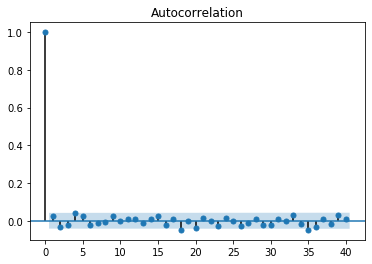

In [56]:
# autocorrelation test

import statsmodels.tsa.api as smt
plt.figure(figsize=(1,2))
acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

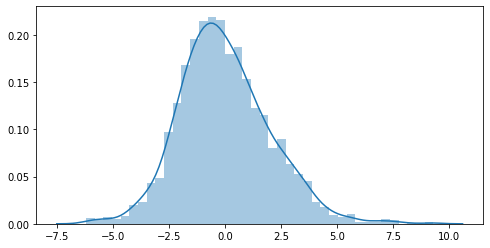

In [57]:
# normality
plt.figure(figsize=(8,4))
sns.distplot(model.resid)

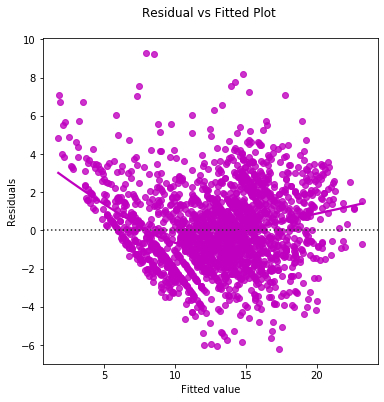

In [58]:
#Linearity test

fitted_vals = model.predict()
resids = model.resid
plt.figure(figsize=(6,6))
ax=sns.residplot(fitted_vals, resids, lowess = True, color = 'm')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

In [59]:
model.resid.mean()

3.26077750659434e-12